# Desafio Kaggle Titanic
### Grupo: 
#### Integrantes: Eric Gomes - William Lourenço - Silvestre Rocha


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [2]:
train.shape

(891, 12)

In [3]:
test.shape

(418, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


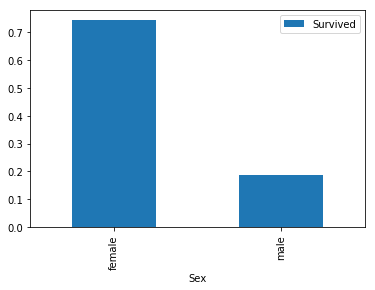

In [9]:
#verificando dados de Sexo dos passageiros
sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()

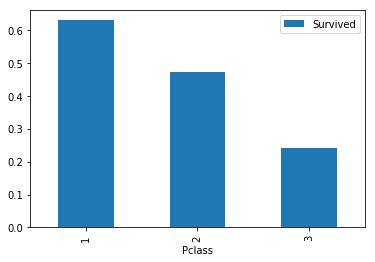

In [8]:
#Verificando a Classe do Passageiro para determinar o volume de sobreviventes
pclass_pivot = train.pivot_table(index='Pclass', values='Survived')
pclass_pivot.plot.bar()

TypeError: 'module' object is not callable

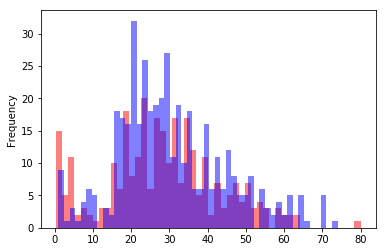

In [10]:
#Verificando a idade do passageiro para determinar o volume de sobreviventes
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]
survived['Age'].plot.hist(alpha=0.5, color='red', bins=50)
died['Age'].plot.hist(alpha=0.5, color='blue', bins=50)
plt.legend(['Survived', 'Died'])

In [ ]:
#Tratamento de NaN e criação de ranges de idade
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'],cut_points, labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 60, 100]
label_names = ['Missing', 'Infant','Child', 'Teenager', 'Young Adult', 'Adult', 'Senior' ]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

In [11]:
pivot = train.pivot_table(index='Age_categories', values='Survived')
pivot.plot.bar(color='g')

KeyError: 'Age_categories'